# Visualize MoGP trajectory patterns (Figure 1)
This notebook generates full panel visualization of MoGP clusters  

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%load_ext autoreload
%autoreload 2

In [2]:
import mogp
from analysis_utils import *

import math
import joblib
import numpy as np
import pandas as pd
from string import ascii_lowercase
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
# Formatting params
sns.set(font_scale=2)
sns.set_style("white")

col_palette = ['#176D9C', '#DBA137','#86AF49' ,'#df473c','#ae3c60', '#82b4bb']

parameters = {'pdf.fonttype': 42}
plt.rcParams.update(parameters)

# Figure 1 - Full MoGP Panel for PROACT (20 largest clusters visualized)

In [4]:
exp_path = Path('data/model_data/1_alsfrsr_all')

In [5]:
# Select best MAP model
cur_proj = 'proact'
cur_model_path = exp_path / 'results' / 'rbf'
cur_data_path = exp_path / 'data_{}_min3_alsfrst.pkl'.format(cur_proj)

cur_model_suffix = 'model_{}_min3_alsfrst'.format(cur_proj)
cur_model = get_map_model(cur_model_path, cur_model_suffix, num_seeds=5)
cur_data = joblib.load(cur_data_path)

seed did not pass monotonicity test: 3
seed did not pass monotonicity test: 4
best seed: 2, ll -3853.8510614331317


In [6]:
# Save reference model
ref_save_path = Path('../example/mogp_reference_model.pkl')
joblib.dump(cur_model, ref_save_path)

Number of clusters in model: 92


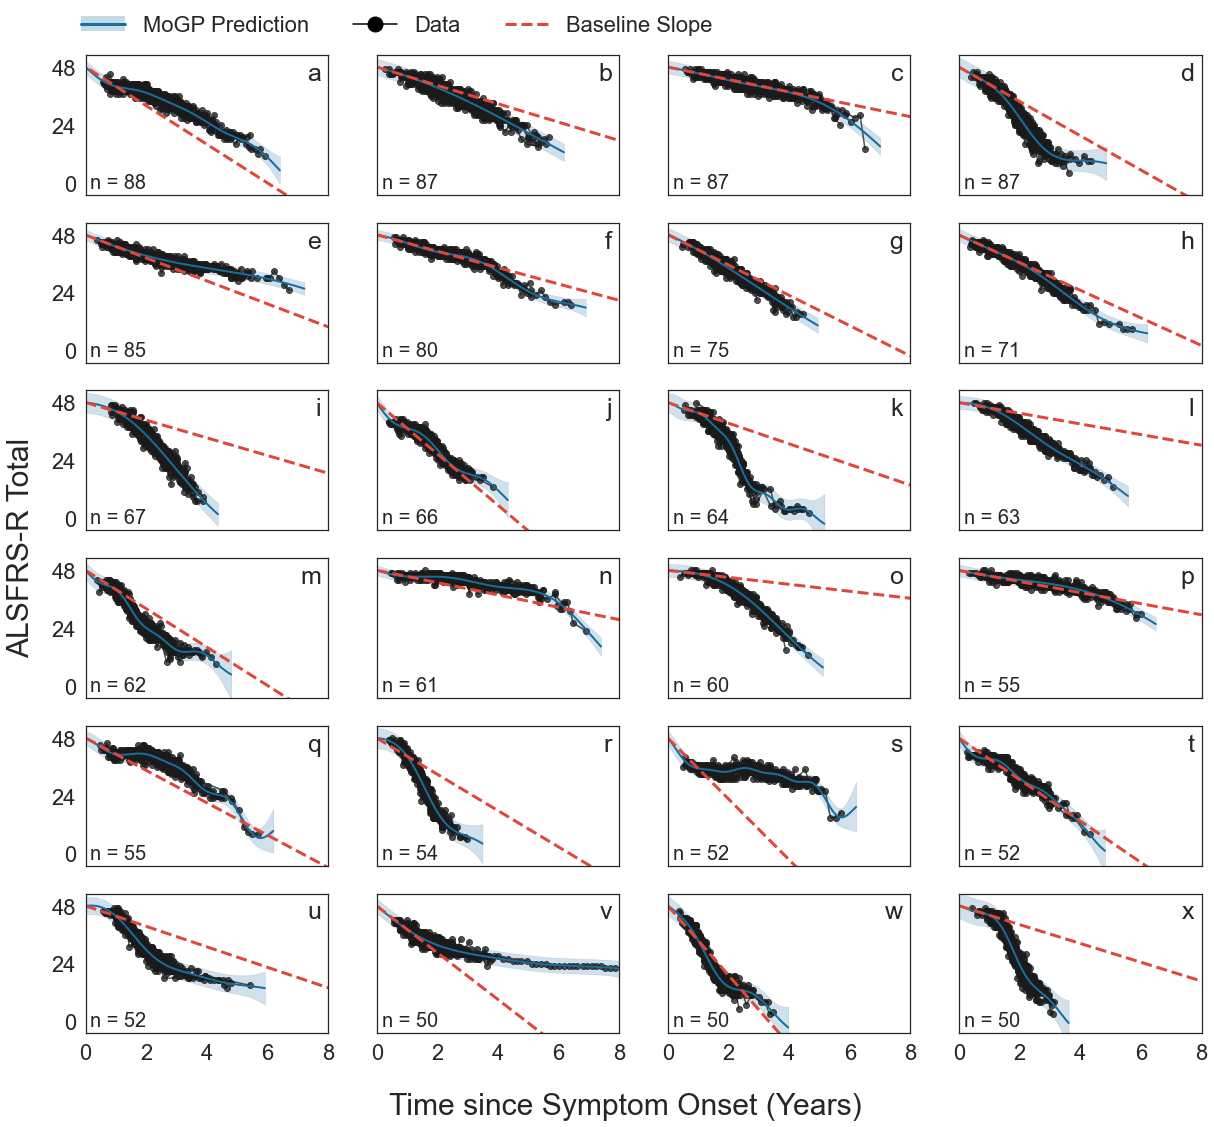

In [7]:
# Plot panel
cur_fig, cur_axs, df_clust = plot_mogp_panel(cur_model, cur_data, disp_clust=24, k_alph_flag=True, mogp_color=col_palette[0], slope_color=col_palette[3])

# Edit x and y labels
x_lab = cur_fig.text(0.5, 0.08, 'Time since Symptom Onset (Years)', va='top', ha='center', transform=cur_fig.transFigure, fontsize=30)
y_lab = cur_fig.text(0.09, 0.5, 'ALSFRS-R Total', rotation='vertical', va='center', ha='right', transform=cur_fig.transFigure, fontsize=30)

# Create legend
blue_line = matplotlib.lines.Line2D([], [], color=col_palette[0], linewidth=3)
blue_patch = matplotlib.patches.Patch(color=col_palette[0], alpha=0.25, linewidth=0)
red_line = matplotlib.lines.Line2D([], [], color=col_palette[3], linestyle='dashed', linewidth=3)
black_dots = matplotlib.lines.Line2D([], [], color='black', marker='o', markersize=15)
leg = cur_axs.flat[0].legend(((blue_line, blue_patch), black_dots, red_line), ('MoGP Prediction', 'Data', 'Baseline Slope',), frameon=False, loc='lower left', bbox_to_anchor=(-0.1, 1), ncol=3) 

# Display number of clusters in model
print('Number of clusters in model: {}'.format(len(np.unique(cur_model.z))))

# Save Figure
# cur_fig.savefig('reports/fig_1_mogp_fullpanel.pdf', bbox_inches='tight')

In [8]:
# Display cluster slopes and estimates
df_slope = calc_clust_slope(cur_model, cur_data)
df_clust_merge = df_clust.set_index('k').join(df_slope)
df_clust_merge.sort_values(by=['slope'], ascending=True)

,k_alph,estim_diff,slope
k,,,
41,r,-18.194404,-1.932247
29,x,-27.496538,-1.809222
60,w,4.954275,-1.644238
12,k,-24.199122,-1.482232
36,d,-14.416303,-1.335624
34,m,-9.154325,-1.166759
21,i,-16.847785,-1.160132
2,u,-13.686838,-1.071703
19,j,2.479712,-0.797573


# Supplemental Figure 1: Extended MoGP panel for PRO-ACT

Number of clusters in model: 92


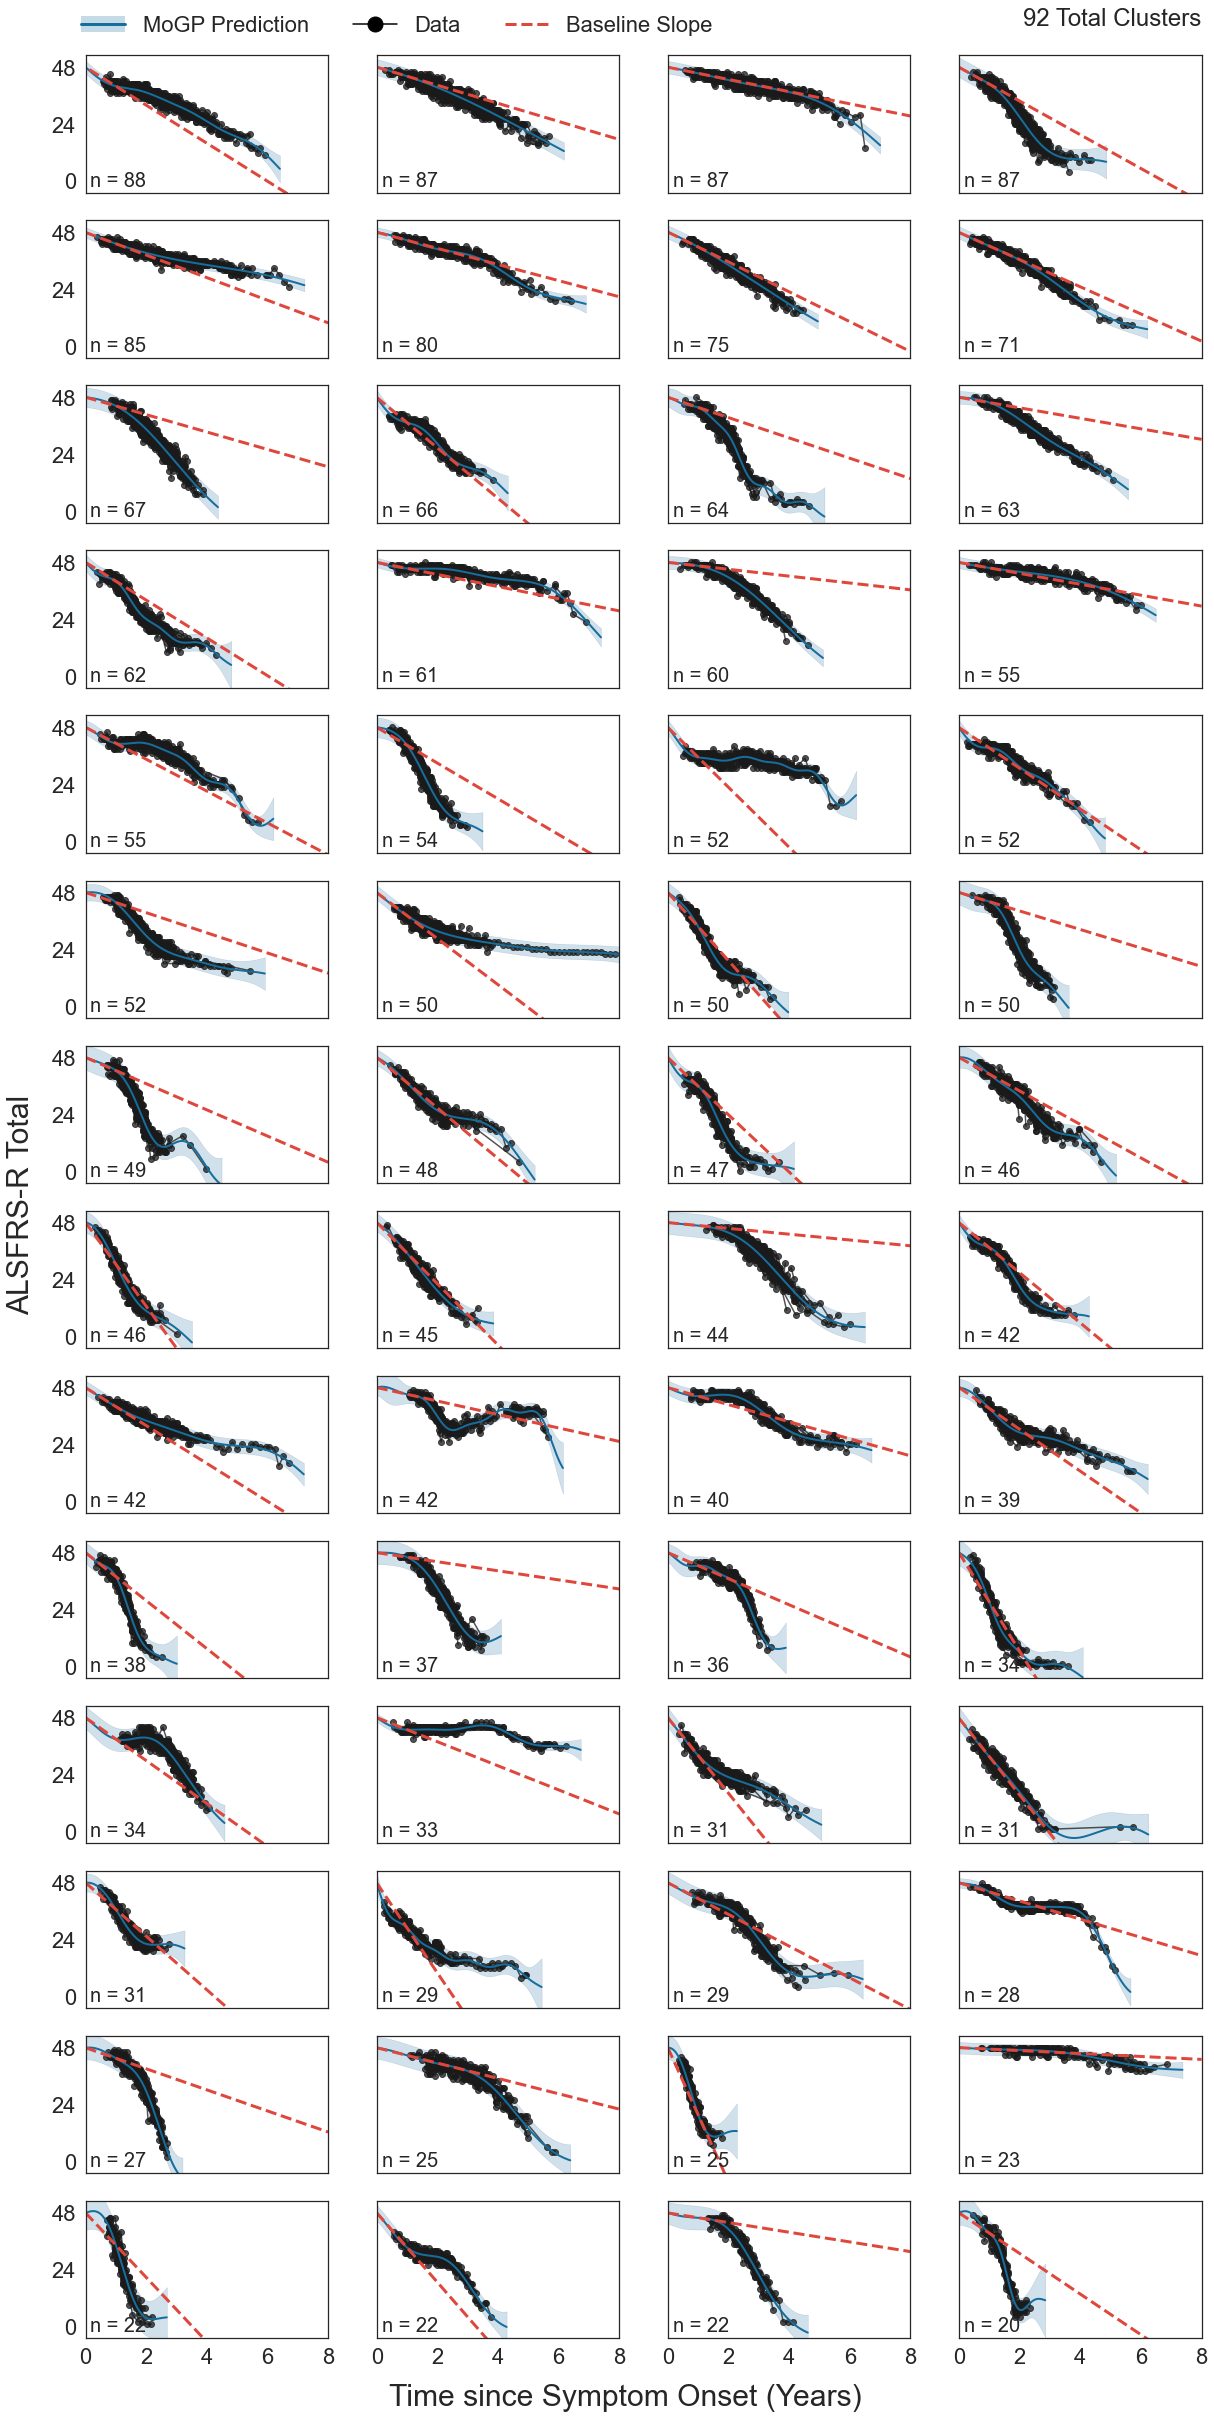

In [9]:
# Plot panel
ext_dc = get_clust_num_perc(cur_model, vis_perc=0.9)
ext_dc = math.ceil(ext_dc/4)*4 #round to the nearest 4 
    
cur_fig, cur_axs, df_clust = plot_mogp_panel(cur_model, cur_data, disp_clust=ext_dc, k_alph_flag=False, mogp_color=col_palette[0], slope_color=col_palette[3])

# Edit x and y labels
x_lab = cur_fig.text(0.5, 0.11, 'Time since Symptom Onset (Years)', va='top', ha='center', fontsize=30) #transform=cur_fig.transFigure, 
y_lab = cur_fig.text(0.09, 0.5, 'ALSFRS-R Total', rotation='vertical', va='center', ha='right', transform=cur_fig.transFigure, fontsize=30)

# Create legend
blue_line = matplotlib.lines.Line2D([], [], color=col_palette[0], linewidth=3)
blue_patch = matplotlib.patches.Patch(color=col_palette[0], alpha=0.25, linewidth=0)
red_line = matplotlib.lines.Line2D([], [], color=col_palette[3], linestyle='dashed', linewidth=3)
black_dots = matplotlib.lines.Line2D([], [], color='black', marker='o', markersize=15)
leg = cur_axs.flat[0].legend(((blue_line, blue_patch), black_dots, red_line), ('MoGP Prediction', 'Data', 'Baseline Slope',), frameon=False, loc='lower left', bbox_to_anchor=(-0.1, 1), ncol=3) 

clust_num_title = cur_fig.text(0.9, 0.89, '{} Total Clusters'.format(len(np.unique(cur_model.z))), ha='right') #transform=cur_fig.transFigure

# Display number of clusters in model
print('Number of clusters in model: {}'.format(len(np.unique(cur_model.z))))

# Save Figure
cur_fig.savefig('reports/supp_fig_mogp_fullpanel_extend_{}_90.pdf'.format('proact'), bbox_inches='tight')

# Supplemental Figure 1: MoGP panel for studies: aals, gtac, ceft, emory, nathist

aals
seed did not pass monotonicity test: 1
seed did not pass monotonicity test: 2
best seed: 3, ll -1278.4487999097823
ceft
best seed: 2, ll -1223.028158410827
emory
seed did not pass monotonicity test: 2
best seed: 3, ll -1248.0646004570403
nathist
seed did not pass monotonicity test: 1
best seed: 3, ll -2751.6775577675207


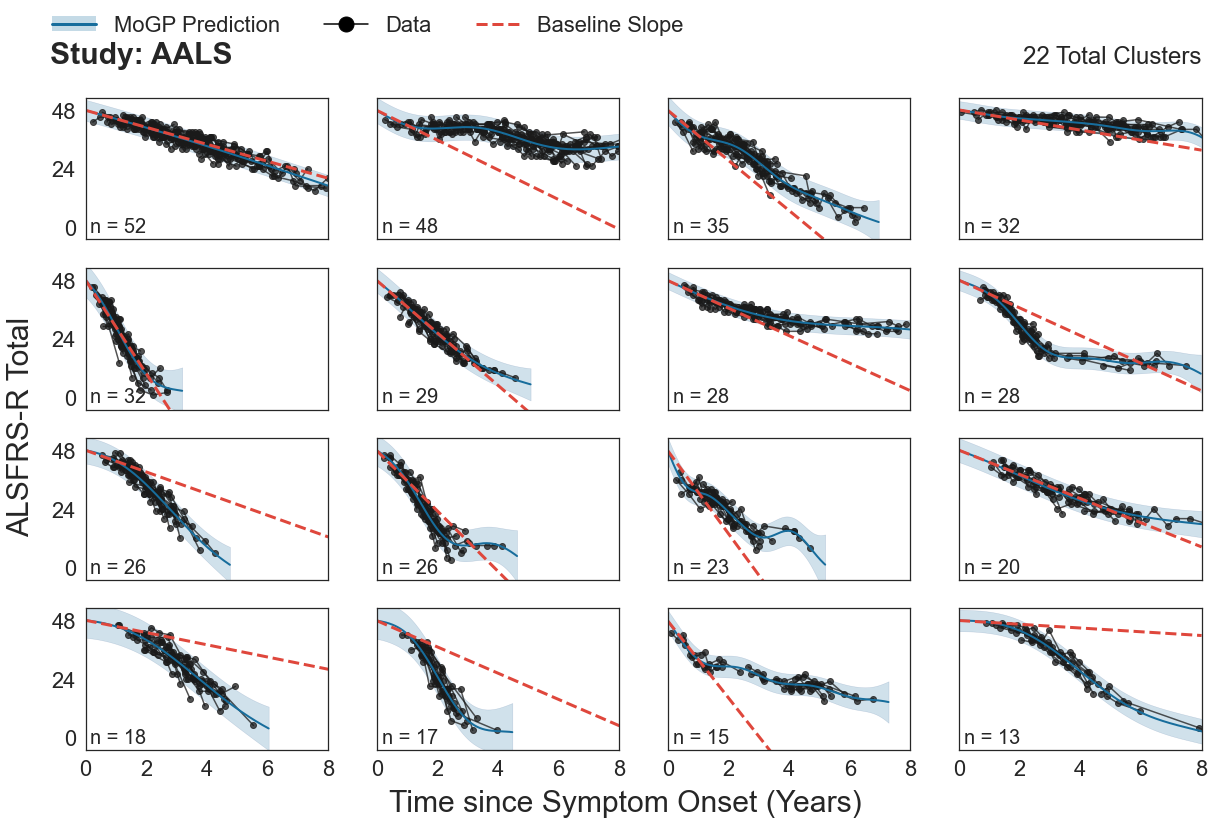

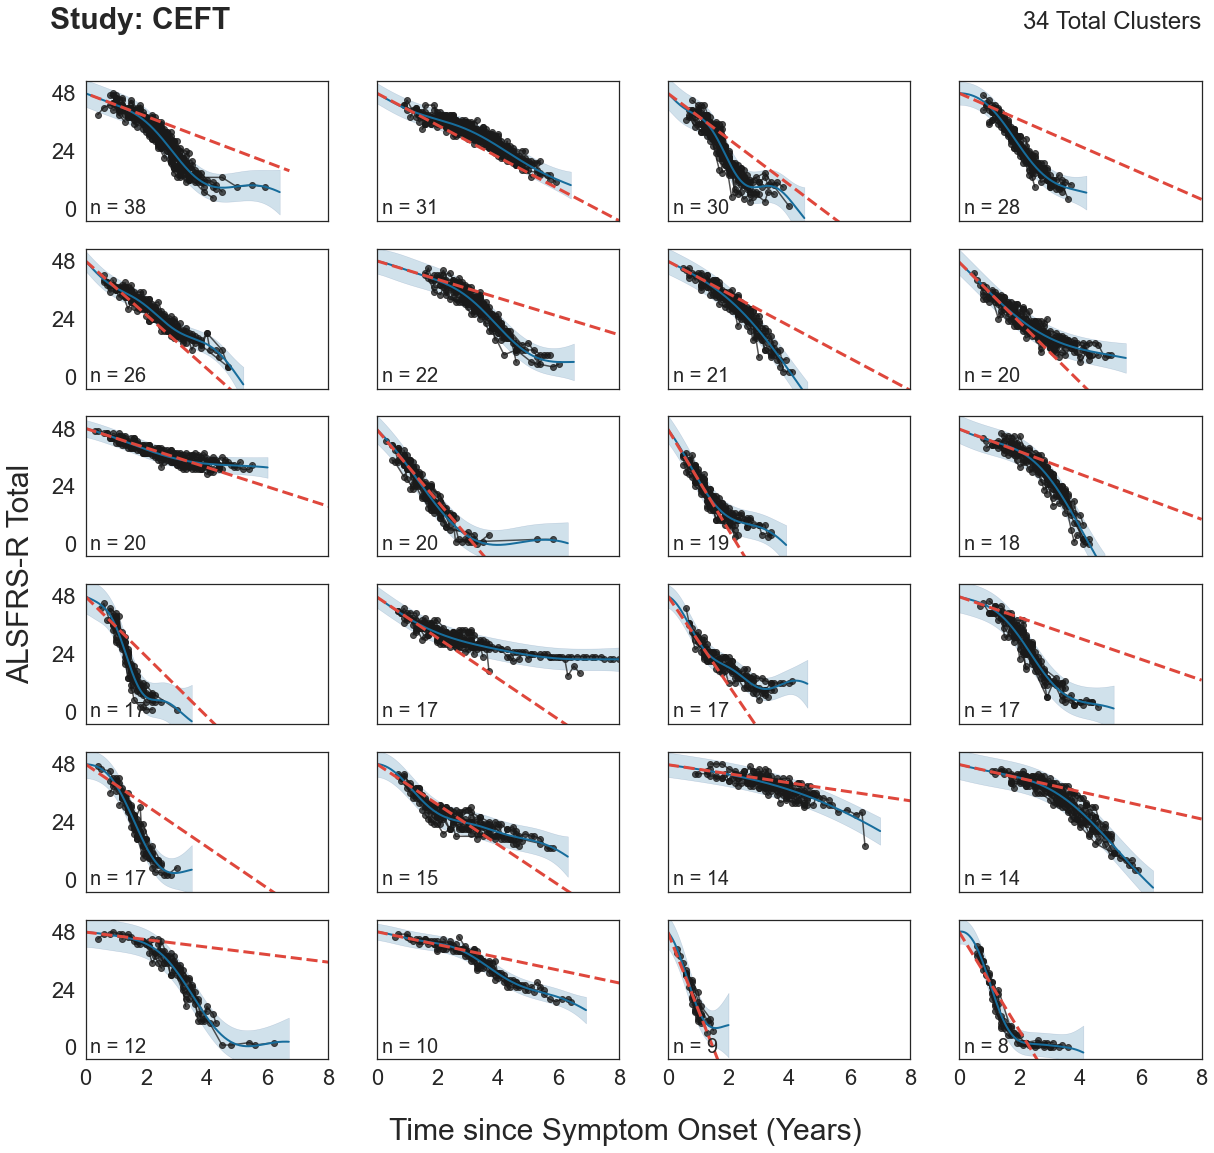

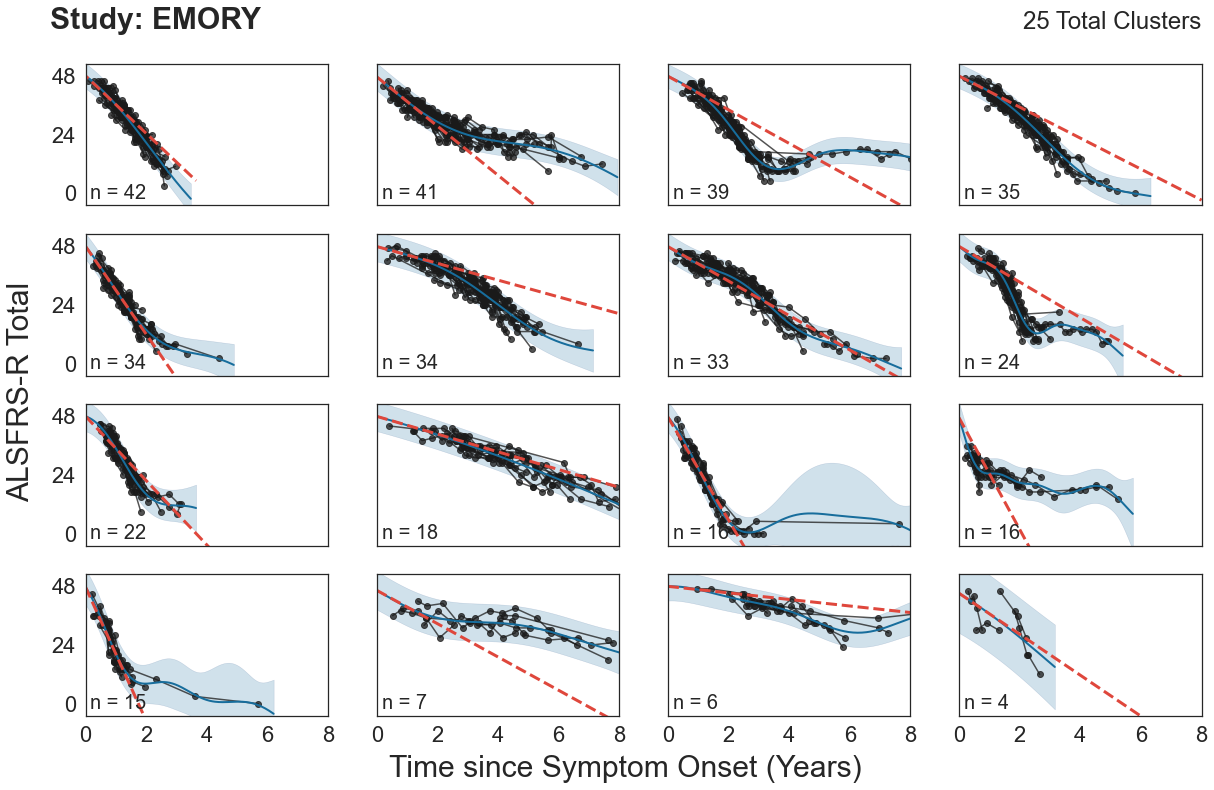

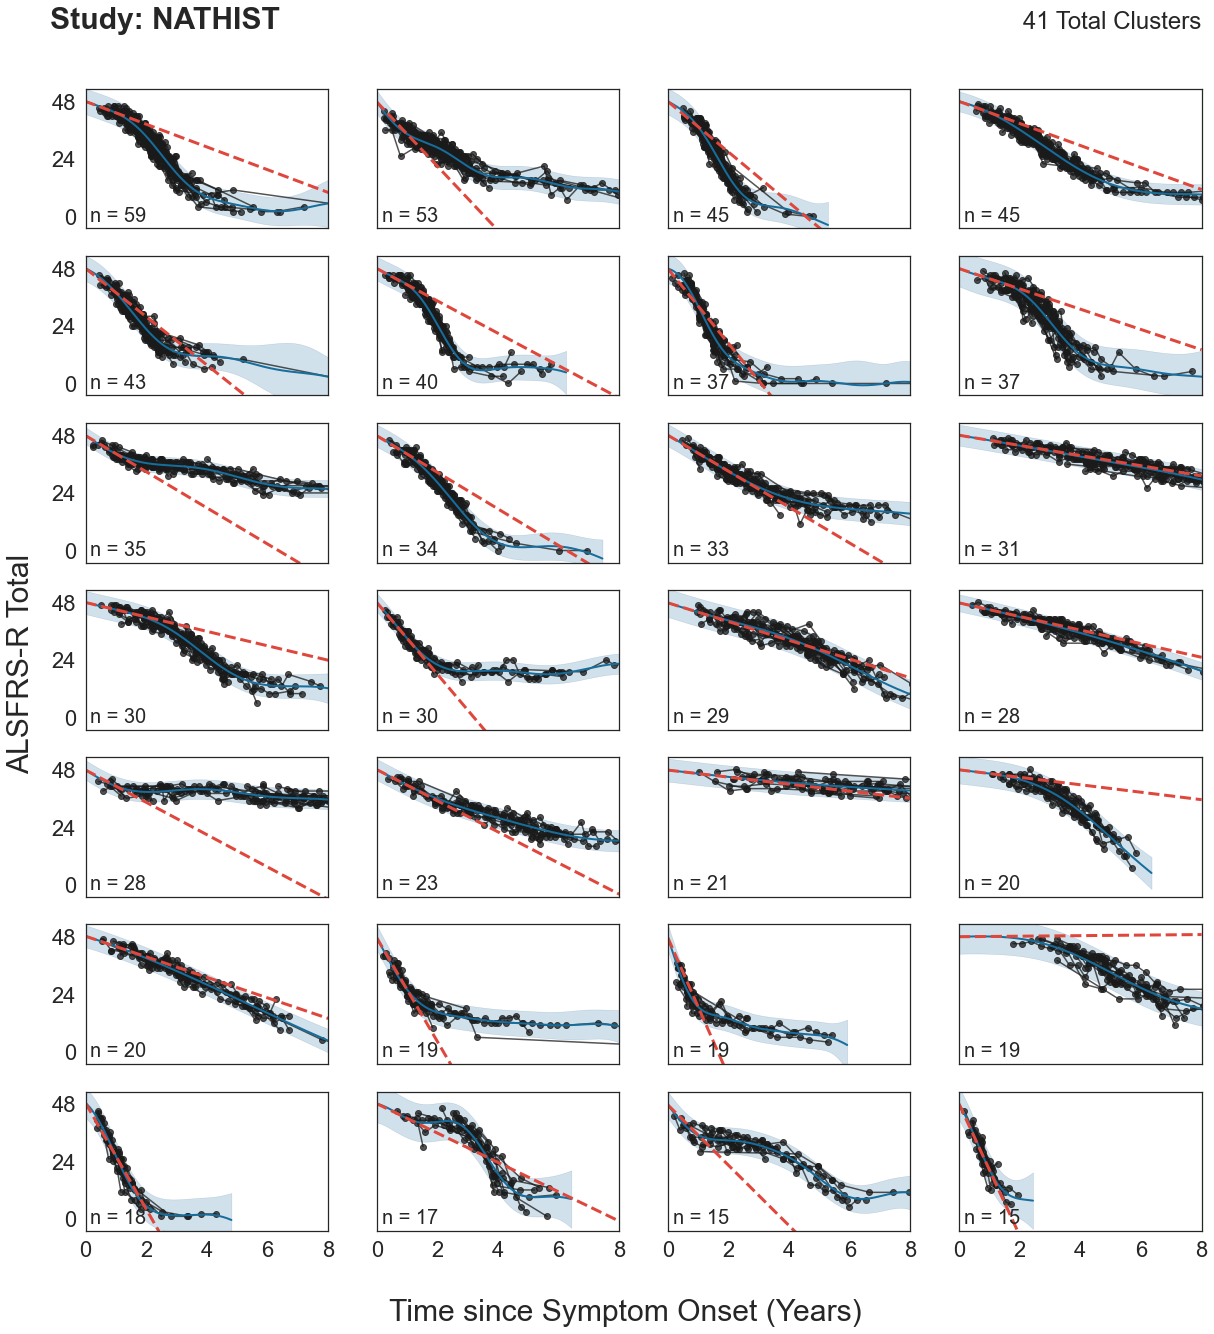

In [10]:
label_projs = {'aals': 'AALS', 'ceft': 'CEFT', 'emory': 'EMORY', 'proact': 'PRO-ACT', 'nathist':'NATHIST'}
exp_path = Path('data/model_data/1_alsfrsr_all')

for cur_proj in ['aals', 'ceft', 'emory', 'nathist']:
    # Select best MAP model
    print(cur_proj)    
    cur_model_path = exp_path / 'results' / 'rbf'
    cur_data_path = exp_path / 'data_{}_min3_alsfrst.pkl'.format(cur_proj)

    cur_model_suffix = 'model_{}_min3_alsfrst'.format(cur_proj)
    cur_model = get_map_model(cur_model_path, cur_model_suffix, num_seeds=5)
    cur_data = joblib.load(cur_data_path)
    
    ext_dc = get_clust_num_perc(cur_model)
    ext_dc = math.ceil(ext_dc/4)*4 #round to the nearest 4 
    
    # Plot cur_figure
    cur_fig, cur_axs, df_clust = plot_mogp_panel(cur_model, cur_data, disp_clust=ext_dc, k_alph_flag=False, mogp_color=col_palette[0], slope_color=col_palette[3])


    # Edit x and y labels, title
    x_lab = cur_fig.text(0.5, 0.08, 'Time since Symptom Onset (Years)', va='top', ha='center', transform=cur_fig.transFigure, fontsize=30)
    y_lab = cur_fig.text(0.09, 0.5, 'ALSFRS-R Total', rotation='vertical', va='center', ha='right', transform=cur_fig.transFigure, fontsize=30)
    study_title = cur_fig.text(0.1, 0.92, 'Study: {}'.format(label_projs[cur_proj]),  ha='left', transform=cur_fig.transFigure, fontweight='bold', fontsize=30)
    clust_num_title = cur_fig.text(0.9, 0.92, '{} Total Clusters'.format(len(np.unique(cur_model.z))), ha='right', transform=cur_fig.transFigure)


    if cur_proj == 'aals':
        # Create legend
        blue_line = matplotlib.lines.Line2D([], [], color=col_palette[0], linewidth=3)
        blue_patch = matplotlib.patches.Patch(color=col_palette[0], alpha=0.25, linewidth=0)
        red_line = matplotlib.lines.Line2D([], [], color=col_palette[3], linestyle='dashed', linewidth=3)
        black_dots = matplotlib.lines.Line2D([], [], color='black', marker='o', markersize=15)
        leg = cur_axs.flat[0].legend(((blue_line, blue_patch), black_dots, red_line), ('MoGP Prediction', 'Data', 'Baseline Slope',), frameon=False, loc='lower left', bbox_to_anchor=(-0.22, 1.3), ncol=3) 

    # Save cur_figure
    cur_fig.savefig('reports/supp_fig_fullpanel_extend_{}.pdf'.format(cur_proj), bbox_inches='tight')